In [22]:
!pip install mysql-connector-python


In [23]:
import mysql.connector
print("MySQL connector imported successfully!")


MySQL connector imported successfully!


In [24]:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [48]:
DB_USER = "root"
DB_PASS = "copra^outrage1"
DB_HOST = "localhost"         
DB_PORT = 3306
DB_NAME = "steam_db"

engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}",
                       pool_pre_ping=True)


In [27]:
sql = """
SELECT price, positive, negative, release_year, 
       CASE WHEN price = 0 THEN 1 ELSE 0 END AS is_free
FROM steam_games
WHERE price IS NOT NULL
LIMIT 100000;
"""
df = pd.read_sql(sql, engine)

In [31]:

df['positive'] = pd.to_numeric(df['positive'], errors='coerce').fillna(0)
df['negative'] = pd.to_numeric(df['negative'], errors='coerce').fillna(0)


df['total_reviews'] = df['positive'] + df['negative']


df['positive_rate'] = df['positive'] / df['total_reviews']
df['positive_rate'] = df['positive_rate'].fillna(0.5)


In [32]:
X = df[['price', 'positive_rate', 'release_year']]

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
k = 4  # you can change this
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [35]:
print(df['cluster'].value_counts())

cluster
1    62716
0    37284
Name: count, dtype: int64


In [40]:

ct.columns = ['Paid (0)','Free (1)']
print(ct)

         Paid (0)  Free (1)
cluster                    
0           31223      6061
1           48378     14338


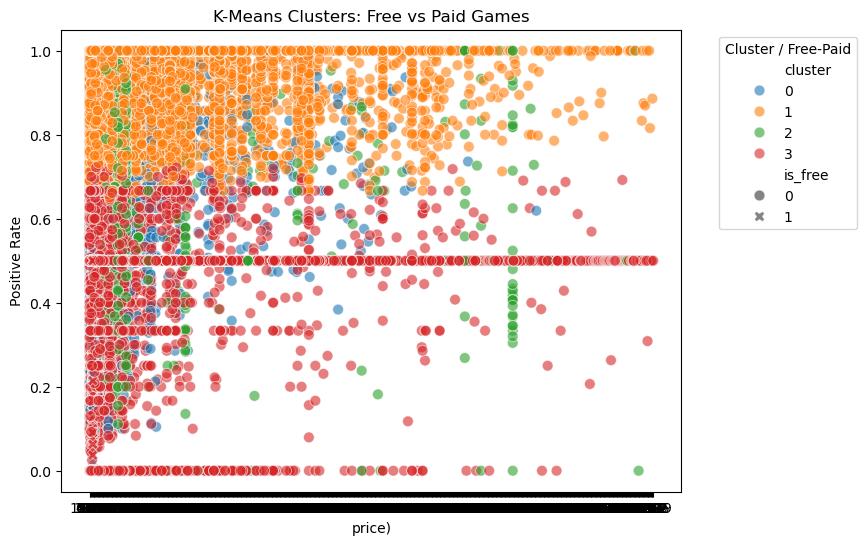

In [46]:
plt.figure(figsize=(8,6))


sns.scatterplot(
    x='price',
    y='positive_rate',
    hue='cluster',
    style='is_free',       
    data=df,
    palette='tab10',        
    s=60,                   
    alpha=0.6
)

plt.title("K-Means Clusters: Free vs Paid Games")
plt.xlabel("price)")
plt.ylabel("Positive Rate")
plt.legend(title='Cluster / Free-Paid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [45]:
pd.crosstab(df['cluster'], df['is_free'])


is_free,0,1
cluster,,
0,19858,4173
1,30365,2150
2,1683,0
3,27695,14076


In [50]:
print(df.columns)
      

Index(['price', 'positive', 'negative', 'release_year', 'is_free',
       'total_reviews', 'positive_rate', 'cluster'],
      dtype='object')
